In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset

In [2]:
data = pd.read_csv('penguins_size.csv')

In [3]:
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


# Univariate Analysis

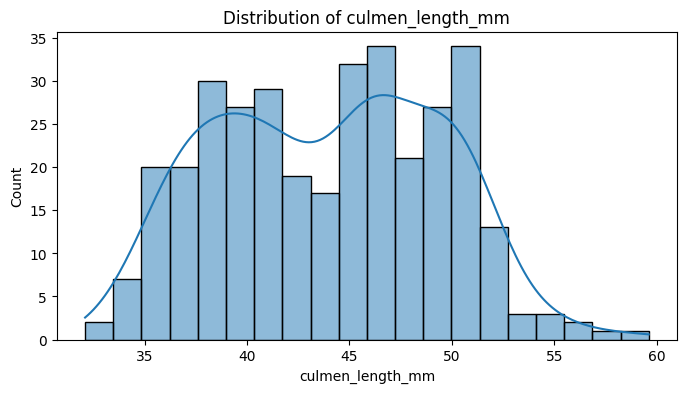

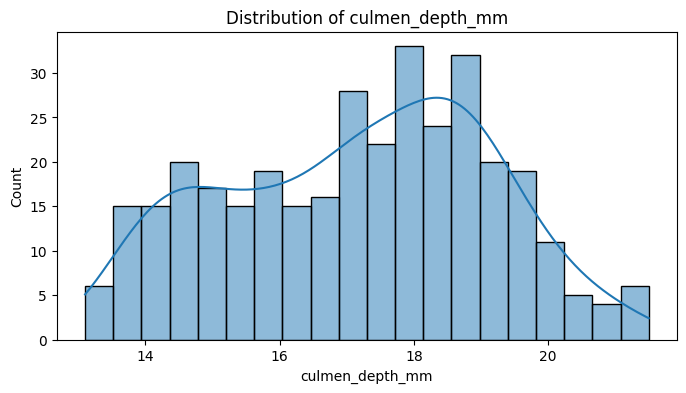

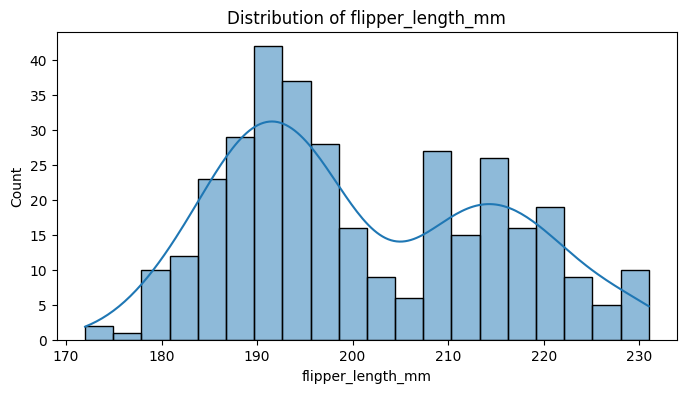

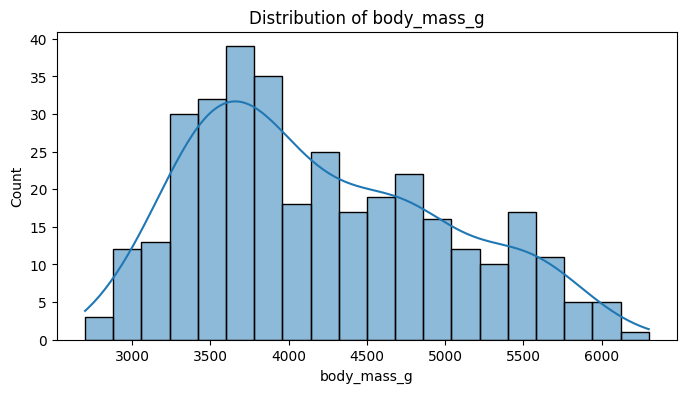

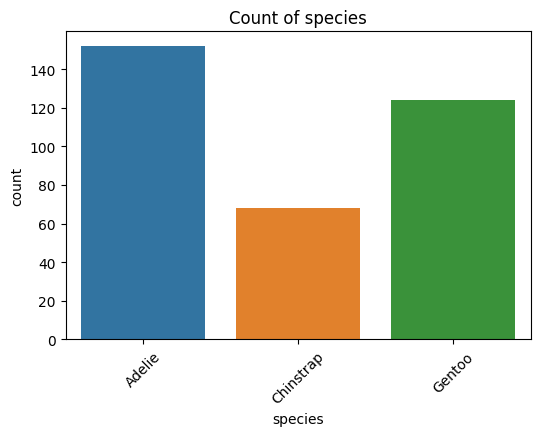

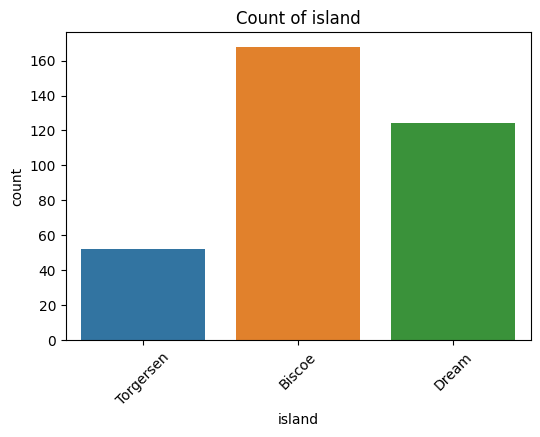

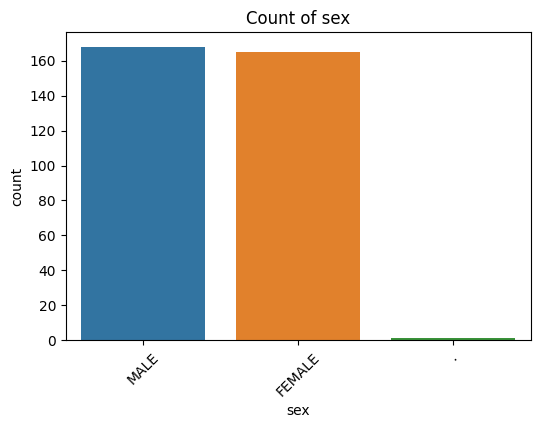

In [4]:
def univariate_analysis(data):
    # Numerical features
    numerical_features = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
    
    for feature in numerical_features:
        plt.figure(figsize=(8, 4))
        sns.histplot(data=data, x=feature, bins=20, kde=True)
        plt.title(f'Distribution of {feature}')
        plt.show()
    categorical_features = ['species', 'island', 'sex']
    
    for feature in categorical_features:
        plt.figure(figsize=(6, 4))
        sns.countplot(data=data, x=feature)
        plt.title(f'Count of {feature}')
        plt.xticks(rotation=45)
        plt.show()

univariate_analysis(data)

# Bivariate Analysis

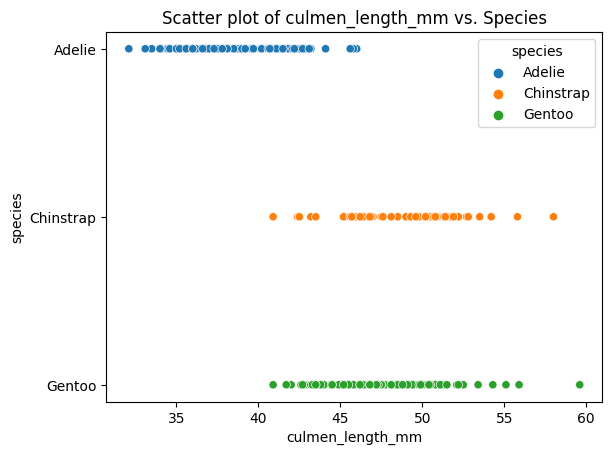

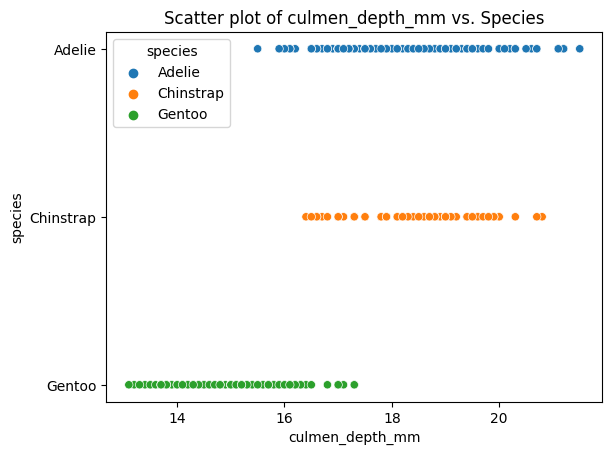

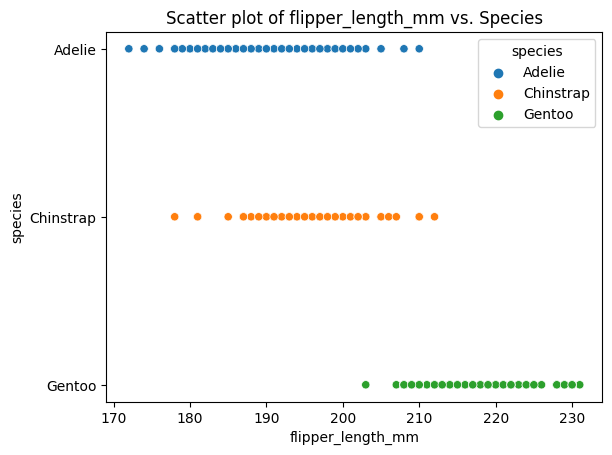

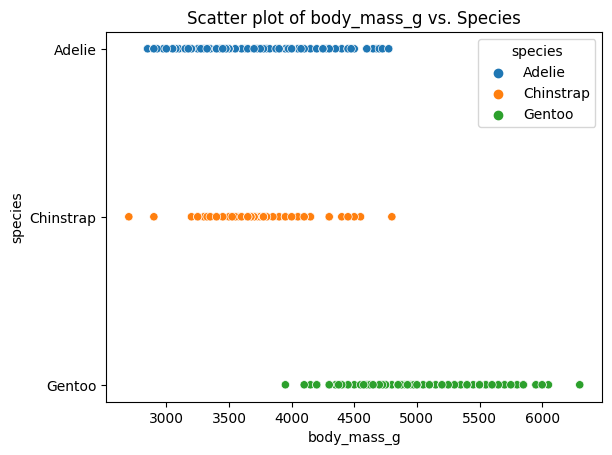

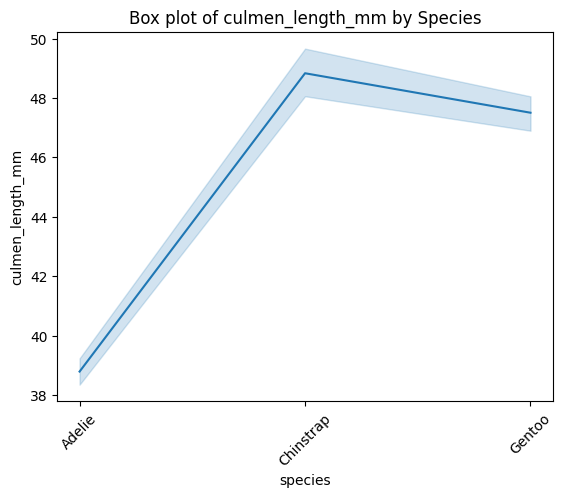

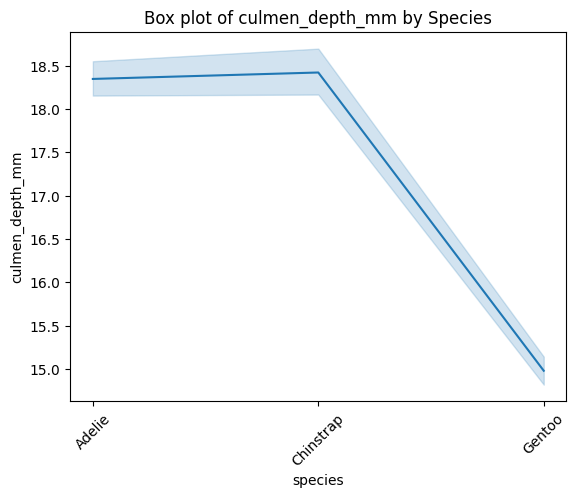

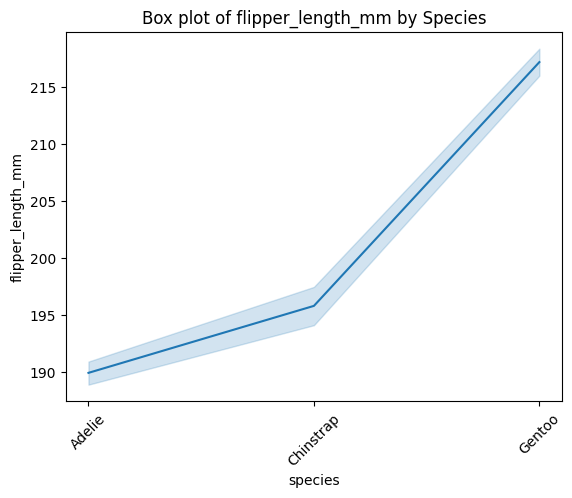

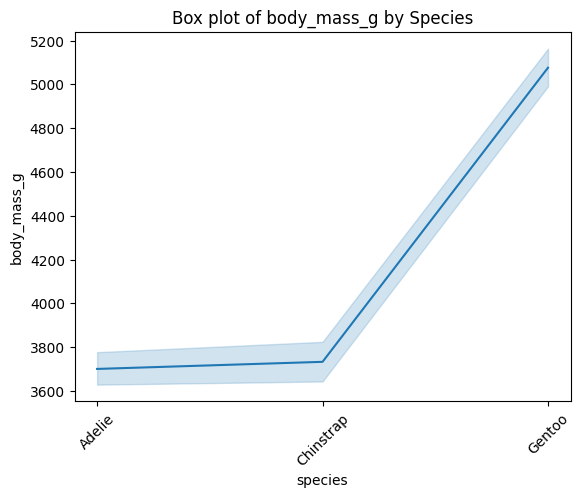

In [5]:
def bivariate_analysis(data):
    numerical_features = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
    
    for feature in numerical_features:
        sns.scatterplot(data=data, x=feature, y='species', hue='species')
        plt.title(f'Scatter plot of {feature} vs. Species')
        plt.show()

    for feature in numerical_features:
        sns.lineplot(data=data, x='species', y=feature)
        plt.title(f'Box plot of {feature} by Species')
        plt.xticks(rotation=45)
        plt.show()

bivariate_analysis(data)

# Multi-Variate Analysis

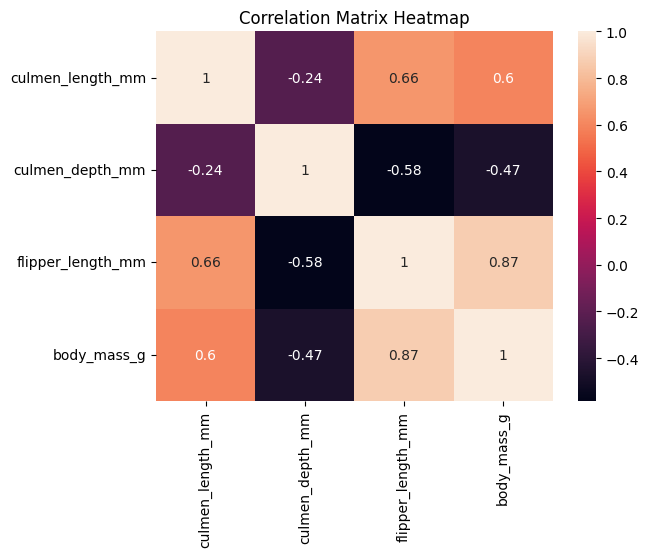

In [6]:
def multi_variate_analysis(data):

    numerical_features = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
    correlation_matrix = data[numerical_features].corr()
    sns.heatmap(data=correlation_matrix, annot=True)
    plt.title('Correlation Matrix Heatmap')
    plt.show()

multi_variate_analysis(data)

C:\Users\akash\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


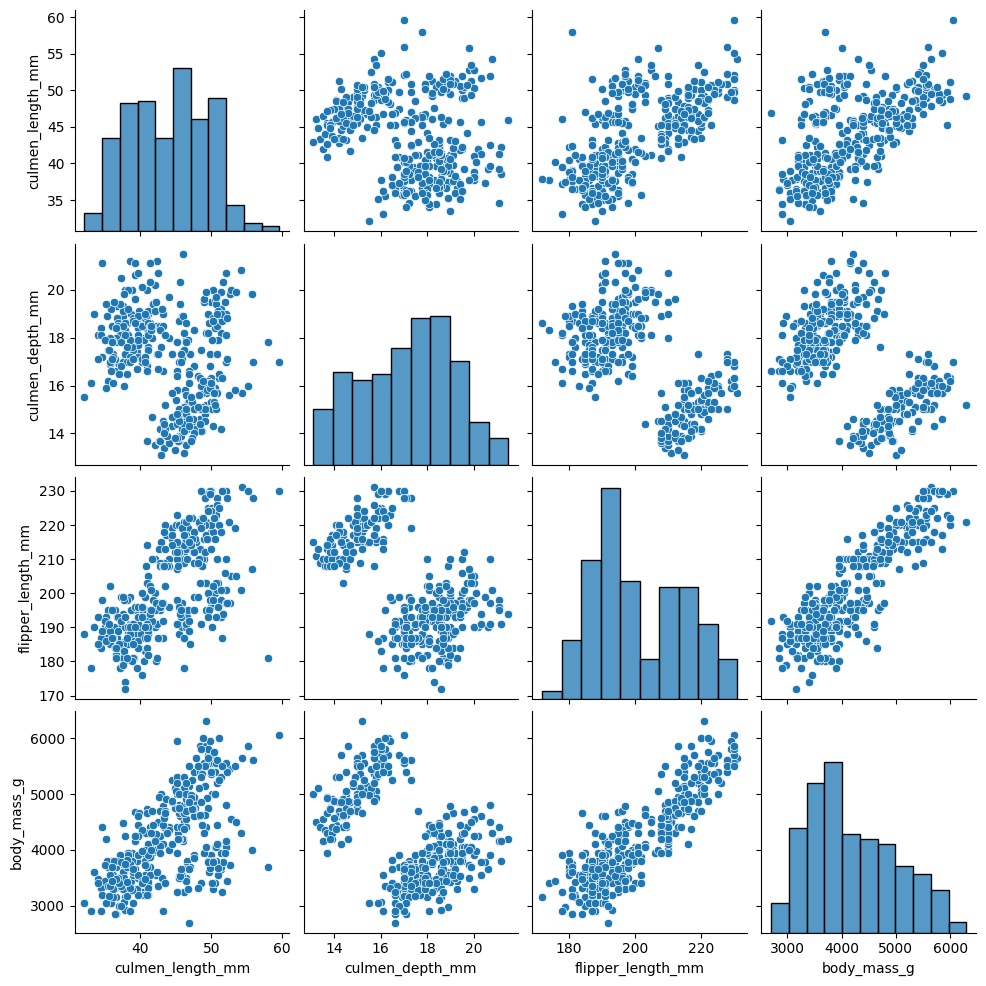

In [7]:
sns.pairplot(data)

# 4. Perform descriptive statistics on the dataset


In [8]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


# 5. Check for Missing values and deal with them

In [9]:
data.isnull().any()

species              False
island               False
culmen_length_mm      True
culmen_depth_mm       True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

In [10]:
data['culmen_length_mm'].fillna(data['culmen_length_mm'].median(),inplace=True)

In [11]:
data['culmen_depth_mm'].fillna(data['culmen_depth_mm'].median(),inplace=True)

In [12]:
data['flipper_length_mm'].fillna(data['flipper_length_mm'].median(),inplace=True)

In [13]:
data['body_mass_g'].fillna(data['body_mass_g'].median(),inplace=True)

In [14]:
data['sex'].fillna(data['sex'].mode()[0],inplace=True)

In [15]:
data.isnull().any()

species              False
island               False
culmen_length_mm     False
culmen_depth_mm      False
flipper_length_mm    False
body_mass_g          False
sex                  False
dtype: bool

# 6. Find the outliers and replace them

<Axes: >

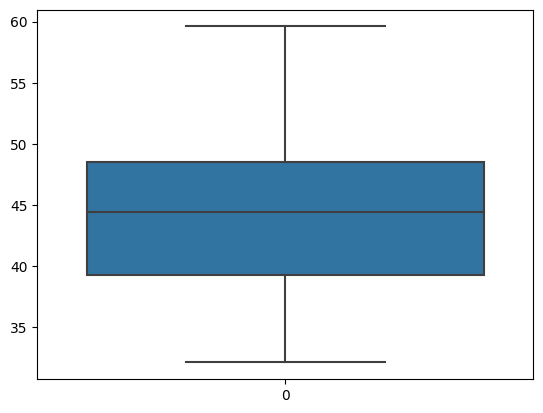

In [16]:
sns.boxplot(data['culmen_length_mm'])

<Axes: >

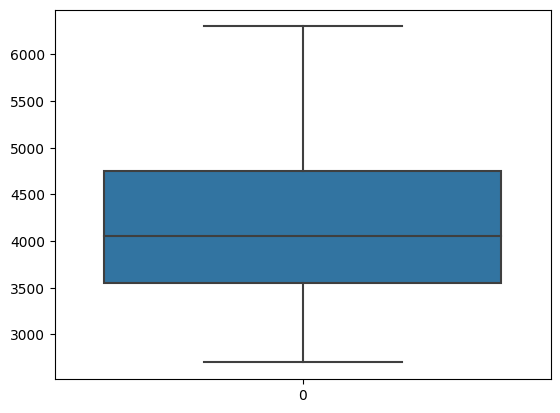

In [17]:
sns.boxplot(data['body_mass_g'])

<Axes: >

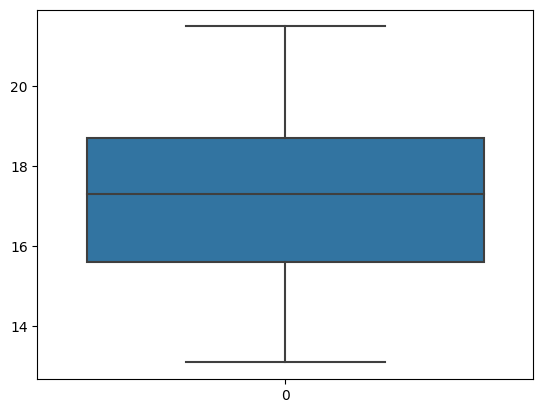

In [18]:
sns.boxplot(data['culmen_depth_mm'])

<Axes: >

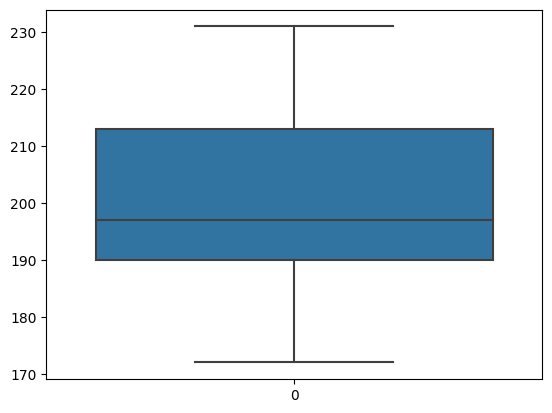

In [19]:
sns.boxplot(data['flipper_length_mm'])

## No outliers detected

# 8. Check for Categorical columns and perform encoding



In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [22]:
data['island'] = le.fit_transform(data['island'])

In [23]:
data['sex'] = le.fit_transform(data['sex'])

In [24]:
data['species'] = le.fit_transform(data['species'])

In [25]:
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10,18.7,181.0,3750.0,2
1,0,2,39.50,17.4,186.0,3800.0,1
2,0,2,40.30,18.0,195.0,3250.0,1
3,0,2,44.45,17.3,197.0,4050.0,2
4,0,2,36.70,19.3,193.0,3450.0,1


# 7. Check the correlation of independent variables with the target


In [26]:
data.corr().species.sort_values(ascending=False)

species              1.000000
flipper_length_mm    0.850819
body_mass_g          0.747547
culmen_length_mm     0.728706
sex                 -0.003823
island              -0.635659
culmen_depth_mm     -0.741282
Name: species, dtype: float64

# 9. Split the data into dependent and independent variables



In [27]:
X = data.drop(columns=['species'], axis=1)
y = data['species']

In [28]:
X.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.10,18.7,181.0,3750.0,2
1,2,39.50,17.4,186.0,3800.0,1
2,2,40.30,18.0,195.0,3250.0,1
3,2,44.45,17.3,197.0,4050.0,2
4,2,36.70,19.3,193.0,3450.0,1


In [29]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int32

# 10. Scaling the data


In [30]:
scaler = StandardScaler()

In [31]:
X_scaled = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

# 11. Split the data into training and testing


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# 12. Check the training and testing data shape


In [33]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (275, 6)
X_test shape: (69, 6)
y_train shape: (275,)
y_test shape: (69,)
